<a href="https://colab.research.google.com/github/ShangZhang4Food/wine_classification/blob/main/Sparkling_Wine_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [52]:
# Import the necessary libraries.
# !pip install opendatasets.
import opendatasets as od
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.utils import shuffle

from scipy.stats import zscore

import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings(action = 'ignore', category = DeprecationWarning)
warnings.filterwarnings(action = 'ignore', category = FutureWarning)

# Import the dataset from Kaggle
od.download("https://www.kaggle.com/piyushagni5/white-wine-quality")
# Obtain the username and password from the Kaggle API, following the following format: 
# {"username":<KAGGLE USERNAME>,"key":"<KAGGLE KEY>"}

Skipping, found downloaded files in "./white-wine-quality" (use force=True to force download)


In [53]:
# Display the dataset
df = pd.read_csv("white-wine-quality/winequality-white.csv", sep = ';')
df.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [54]:
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

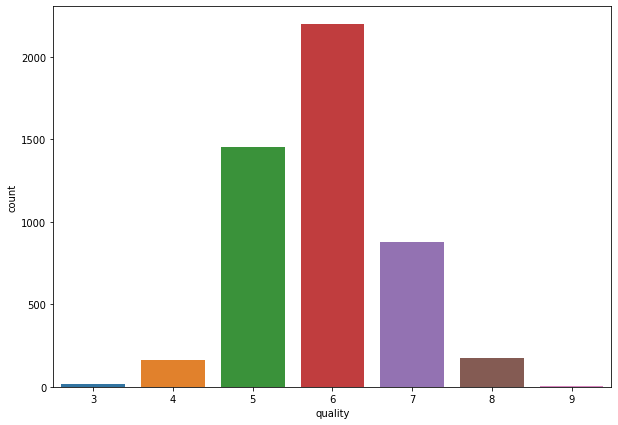

In [55]:
# Separate the dependent and independent variables. 
X = df.drop('quality', axis=1)
y = df['quality'].astype('category')

# Visualize the wine quality distribution. 
plt.figure(figsize = (10,7))
sns.countplot(x = y)